<a href="https://colab.research.google.com/github/pankajr141/experiments/blob/master/Reasoning/timeseries/dynamic_time_warping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tslearn --quiet

In [ ]:
import tslearn
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Lets generate some random data and adjust it to have a mean of 0 and standard deviation of 1

In [ ]:
dataset = random_walks(n_ts=2, sz=100, d=1, random_state=0)
dataset_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(dataset)
dataset_scaled.shape

(2, 100, 1)

In [ ]:
df = pd.DataFrame(dataset_scaled[:, :, 0].T, columns=['x', 'y'])
df.head()

,x,y
0,-0.756436,-1.728092
1,-0.675906,-2.055026
2,-0.478938,-2.363216
3,-0.027966,-2.128063
4,0.347873,-2.412636


lets visualize our 2 timeseries

<Axes: >

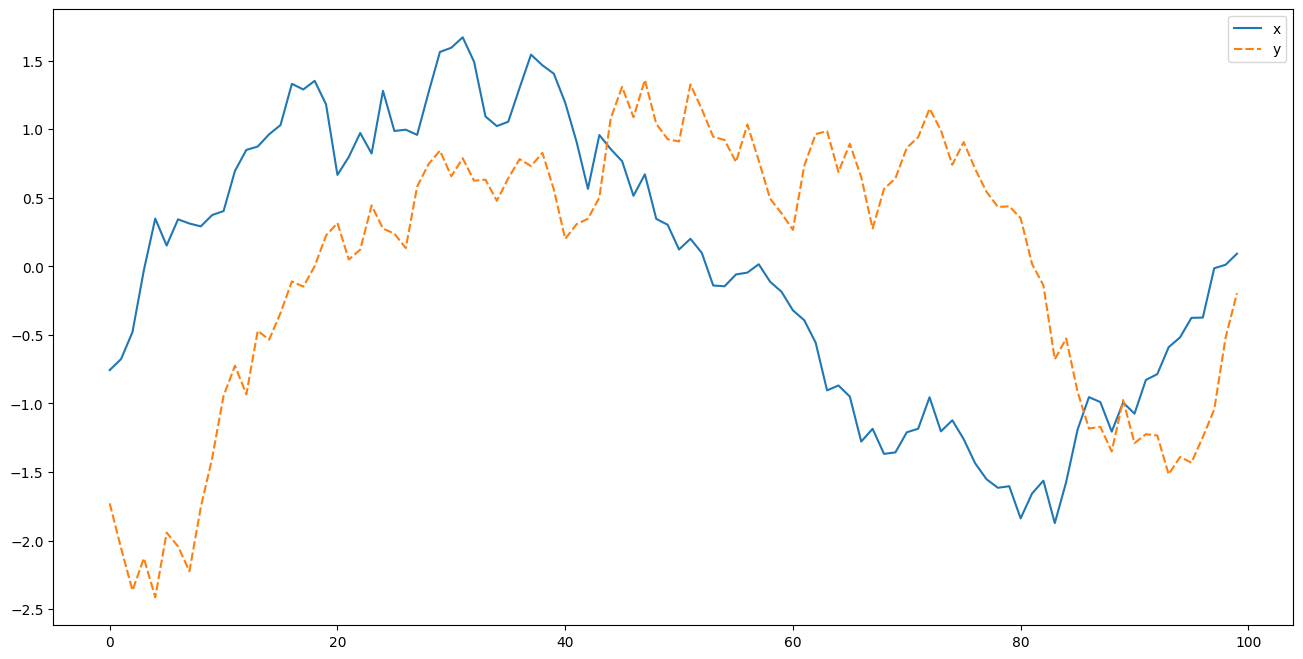

In [ ]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df)

In [ ]:
from tslearn.metrics import dtw
dtw_score = dtw(df['x'], df['y'])
print("dtw_score:", dtw_score)

dtw_score: 4.485257265545512


In [ ]:
from tslearn.metrics import dtw_path
dtw_path, dtw_score = tslearn.metrics.dtw_path(df['x'], df['y'])
print("lcss_path:", dtw_path)

lcss_path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 12), (2, 13), (2, 14), (2, 15), (3, 16), (3, 17), (3, 18), (4, 19), (4, 20), (5, 21), (5, 22), (6, 23), (7, 24), (8, 25), (9, 26), (10, 27), (11, 28), (11, 29), (11, 30), (11, 31), (11, 32), (11, 33), (11, 34), (11, 35), (11, 36), (11, 37), (11, 38), (11, 39), (11, 40), (11, 41), (11, 42), (11, 43), (12, 44), (13, 44), (14, 44), (15, 44), (16, 45), (17, 45), (18, 45), (19, 46), (20, 46), (21, 46), (22, 46), (23, 46), (24, 46), (25, 46), (26, 46), (27, 46), (28, 47), (29, 47), (30, 47), (31, 47), (32, 47), (33, 48), (34, 49), (35, 50), (36, 51), (37, 51), (38, 51), (39, 51), (40, 52), (41, 53), (41, 54), (41, 55), (41, 56), (41, 57), (42, 58), (42, 59), (42, 60), (42, 61), (43, 62), (43, 63), (44, 64), (44, 65), (45, 66), (45, 67), (45, 68), (45, 69), (45, 70), (45, 71), (45, 72), (45, 73), (45, 74), (45, 75), (45, 76), (46, 77), (47, 77), (48, 78), (48, 79), (49, 80), (50, 

lets visualize lcss path between 2 timeseries

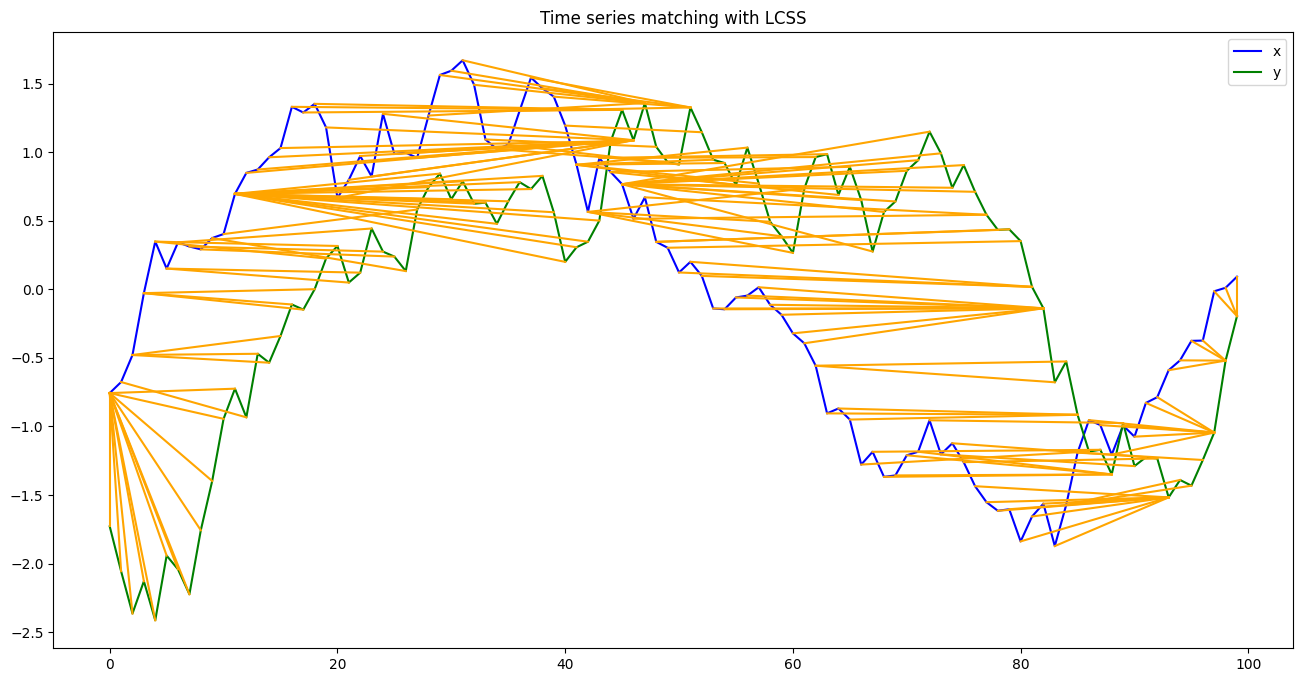

In [ ]:
plt.figure(1, figsize=(16, 8))
plt.plot(df['x'], "b-", label='x')
plt.plot(df['y'], "g-", label='y')

for positions in dtw_path:
    plt.plot([positions[0], positions[1]],
             [df['x'].tolist()[positions[0]], df['y'].tolist()[positions[1]]], color='orange')

plt.legend()
plt.title("Time series matching with LCSS")
plt.show()